# APRIORI, FP-Growth

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time

### loading data

In [2]:
df=pd.read_csv('data\Groceries_dataset.csv')

<>:1: DeprecationWarning: invalid escape sequence '\G'
<>:1: DeprecationWarning: invalid escape sequence '\G'
C:\Users\sara\AppData\Local\Temp\ipykernel_27140\220386048.py:1: DeprecationWarning: invalid escape sequence '\G'
  df=pd.read_csv('data\Groceries_dataset.csv')


#### Data Overview

In [3]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38760,4471,8/10/2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['itemDescription'].nunique()

167

In [7]:
df['itemDescription'].value_counts() 

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [8]:
df.duplicated().sum() # keep duplicates a person might purchase item on the same day more than once

759

### Data Preprocessing

In [10]:
#group transactions by member and date
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
print(transactions.head()) 

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object


In [11]:
len(transactions)

14963

In [12]:
transactions

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
                                                   ...                        
4999           26-12-2015                               [bottled water, herbs]
               9/4/2014                      [semi-finished bread, newspapers]
5000           10/2/2015          [soda, root vegetables, semi-finished bread]
               16-11-2014                     [bottled beer, other vegetables]
               9/3/2014                        [fruit/vegetable juice, onions]
Name: itemDescription, Length: 14963, dtype: object

In [14]:
#Encode the Transactions
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_df = pd.DataFrame(transactions_matrix, columns=te.columns_)

print(encoded_df.head())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

In [15]:
print(len(encoded_df))

14963


In [16]:
encoded_df = encoded_df.astype(int)
encoded_df.head(10)   

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Apriori

In [17]:
#run apriori to get frequent itemsets
start_time = time.time()

freqitems_apriori = apriori(encoded_df, min_support=0.001, use_colnames=True) 
apriori_execution_time = time.time() - start_time
# Print the execution time
print(f"Apriori Execution Time: {apriori_execution_time:.4f} seconds")



c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Execution Time: 8.6712 seconds


In [18]:
freqitems_apriori.sort_values(by= "support",ascending=False)

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
344,0.001002,"(chicken, margarine)"
201,0.001002,"(chicken, bottled beer)"
202,0.001002,"(chocolate, bottled beer)"
516,0.001002,"(hamburger meat, pastry)"


In [55]:
#Generate association rules from frequent itemsets
rules = association_rules(freqitems_apriori, metric="confidence", min_threshold=0.1,num_itemsets=3)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,1.0,-0.000473,0.975443,-0.184234,0.015130,-0.025175,0.058758
1,(UHT-milk),(whole milk),0.021386,0.157923,0.002540,0.118750,0.751949,1.0,-0.000838,0.955549,-0.252105,0.014367,-0.046519,0.067416
2,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,1.0,-0.000683,0.976656,-0.131343,0.024991,-0.023902,0.083709
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.0,0.000013,1.000682,0.004984,0.018930,0.000681,0.072297
4,(berries),(whole milk),0.021787,0.157923,0.002272,0.104294,0.660414,1.0,-0.001168,0.940127,-0.344543,0.012806,-0.063686,0.059341
5,(beverages),(other vegetables),0.016574,0.122101,0.001738,0.104839,0.858622,1.0,-0.000286,0.980716,-0.143419,0.012689,-0.019663,0.059535
6,(beverages),(soda),0.016574,0.097106,0.001871,0.112903,1.162678,1.0,0.000262,1.017808,0.142275,0.016736,0.017496,0.066087
7,(beverages),(whole milk),0.016574,0.157923,0.001938,0.116935,0.740459,1.0,-0.000679,0.953585,-0.262765,0.011232,-0.048674,0.064604
8,(bottled beer),(other vegetables),0.045312,0.122101,0.004678,0.103245,0.845568,1.0,-0.000854,0.978973,-0.160585,0.028747,-0.021479,0.070780
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-0.000005,0.999874,-0.000702,0.036469,-0.000126,0.101549


In [56]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
127,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
120,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847
125,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,1.0,0.000130,1.026642,0.122281,0.006568,0.025951,0.093273
99,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,1.0,0.000172,1.022008,0.103985,0.010081,0.021534,0.093318
123,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,1.0,0.000102,1.015701,0.076751,0.008130,0.015459,0.089702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,(hamburger meat),(other vegetables),0.021854,0.122101,0.002205,0.100917,0.826507,1.0,-0.000463,0.976438,-0.176685,0.015559,-0.024130,0.059490
84,(pip fruit),(rolls/buns),0.049054,0.110005,0.004946,0.100817,0.916483,1.0,-0.000451,0.989783,-0.087448,0.032090,-0.010323,0.072887
68,(pip fruit),(other vegetables),0.049054,0.122101,0.004946,0.100817,0.825688,1.0,-0.001044,0.976330,-0.181671,0.029755,-0.024244,0.070660
94,(soft cheese),(rolls/buns),0.010025,0.110005,0.001002,0.100000,0.909052,1.0,-0.000100,0.988884,-0.091784,0.008422,-0.011241,0.054557


### FP-Growth

In [41]:
#run fp-growth to get frequent itemsets
start_time = time.time()

feqitems_fp = fpgrowth(encoded_df, min_support=0.001, use_colnames=True)
print(feqitems_fp.head())
fp_execution_time = time.time() - start_time
# Print the execution time
print(f"FP-Growth Execution Time: {fp_execution_time:.4f} seconds")


c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support               itemsets
0  0.157923           (whole milk)
1  0.085879               (yogurt)
2  0.060349              (sausage)
3  0.009490  (semi-finished bread)
4  0.051728               (pastry)
FP-Growth Execution Time: 13.8862 seconds


In [42]:
feqitems_fp.sort_values(by= "support",ascending=False)

,support,itemsets
0,0.157923,(whole milk)
22,0.122101,(other vegetables)
16,0.110005,(rolls/buns)
9,0.097106,(soda)
1,0.085879,(yogurt)
...,...,...
441,0.001002,"(fruit/vegetable juice, margarine)"
436,0.001002,"(shopping bags, margarine)"
134,0.001002,(ready soups)
703,0.001002,"(citrus fruit, cream cheese )"


In [43]:
rules_fpgrowth = association_rules(feqitems_fp, metric='confidence', min_threshold=0.1,num_itemsets=3)
rules_fpgrowth.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,"(other vegetables, yogurt)",(whole milk),0.008087,0.157923,0.001136,0.140496,0.889649,1.0,-0.000141,0.979724,-0.111151,0.006891,-0.020695,0.073845
2,"(yogurt, whole milk)",(other vegetables),0.011161,0.122101,0.001136,0.101796,0.833705,1.0,-0.000227,0.977394,-0.167857,0.008599,-0.023129,0.055551
3,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,1.0,0.000102,1.015701,0.076751,0.008130,0.015459,0.089702
4,"(yogurt, whole milk)",(rolls/buns),0.011161,0.110005,0.001337,0.119760,1.088685,1.0,0.000109,1.011083,0.082380,0.011154,0.010962,0.065956
5,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,1.0,-0.000575,0.988811,-0.063965,0.042784,-0.011316,0.102551
6,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
7,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
8,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,1.0,0.000797,1.082219,0.548014,0.020992,0.075973,0.078050
9,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847


In [44]:
rules_fpgrowth = rules_fpgrowth.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules_fpgrowth

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
9,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847
11,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,1.0,0.000130,1.026642,0.122281,0.006568,0.025951,0.093273
13,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,1.0,0.000172,1.022008,0.103985,0.010081,0.021534,0.093318
3,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,1.0,0.000102,1.015701,0.076751,0.008130,0.015459,0.089702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,(hamburger meat),(other vegetables),0.021854,0.122101,0.002205,0.100917,0.826507,1.0,-0.000463,0.976438,-0.176685,0.015559,-0.024130,0.059490
61,(pip fruit),(rolls/buns),0.049054,0.110005,0.004946,0.100817,0.916483,1.0,-0.000451,0.989783,-0.087448,0.032090,-0.010323,0.072887
62,(pip fruit),(other vegetables),0.049054,0.122101,0.004946,0.100817,0.825688,1.0,-0.001044,0.976330,-0.181671,0.029755,-0.024244,0.070660
105,(soft cheese),(rolls/buns),0.010025,0.110005,0.001002,0.100000,0.909052,1.0,-0.000100,0.988884,-0.091784,0.008422,-0.011241,0.054557


C:\Users\sara\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\sara\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\sara\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


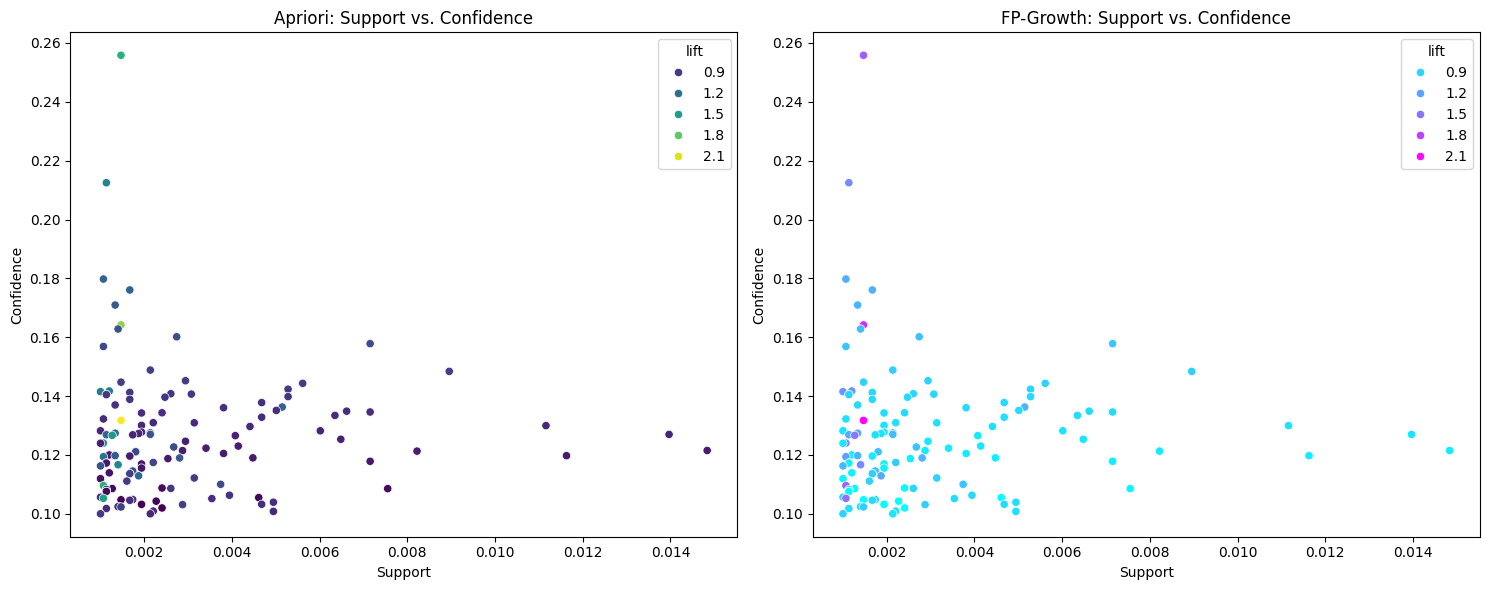

In [45]:
# Create two subplots for Apriori and FP-Growth
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Apriori
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', palette='viridis', ax=axes[0])
axes[0].set_title('Apriori: Support vs. Confidence')
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Confidence')

# Plot for FP-Growth
sns.scatterplot(data=rules_fpgrowth, x='support', y='confidence', hue='lift', palette='cool', ax=axes[1])
axes[1].set_title('FP-Growth: Support vs. Confidence')
axes[1].set_xlabel('Support')
axes[1].set_ylabel('Confidence')

# Show the plot
plt.tight_layout()
plt.show()



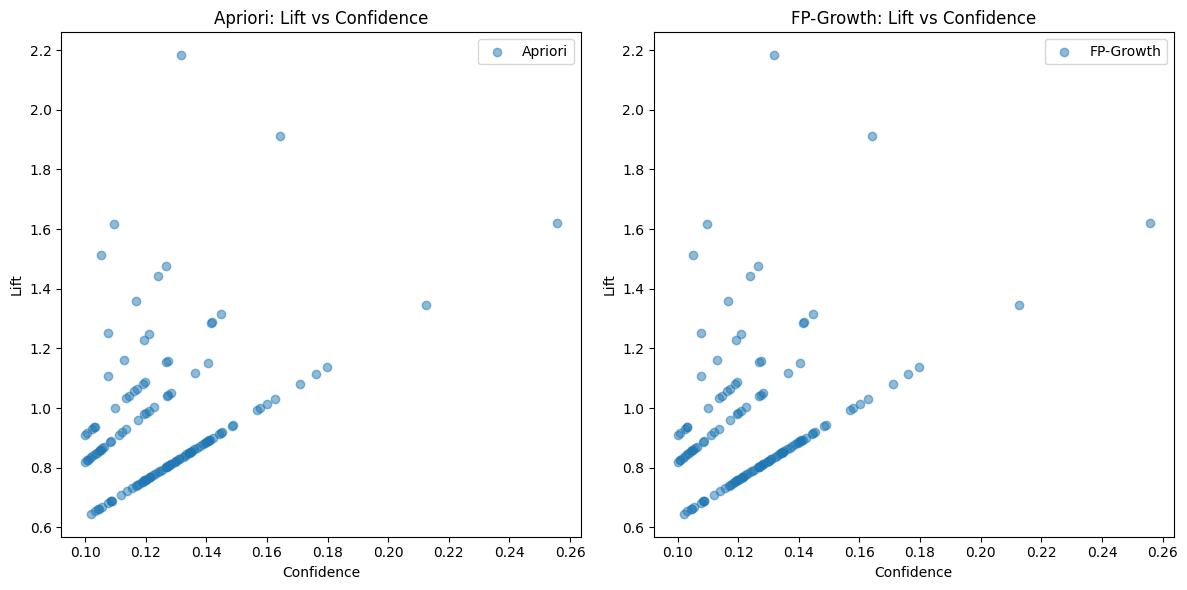

In [48]:
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Apriori
ax[0].scatter(rules['confidence'], rules['lift'], label='Apriori', alpha=0.5)
ax[0].set_xlabel('Confidence')
ax[0].set_ylabel('Lift')
ax[0].set_title('Apriori: Lift vs Confidence')
ax[0].legend()

# Plot for FP-Growth
ax[1].scatter(rules_fpgrowth['confidence'], rules_fpgrowth['lift'], label='FP-Growth', alpha=0.5)
ax[1].set_xlabel('Confidence')
ax[1].set_ylabel('Lift')
ax[1].set_title('FP-Growth: Lift vs Confidence')
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


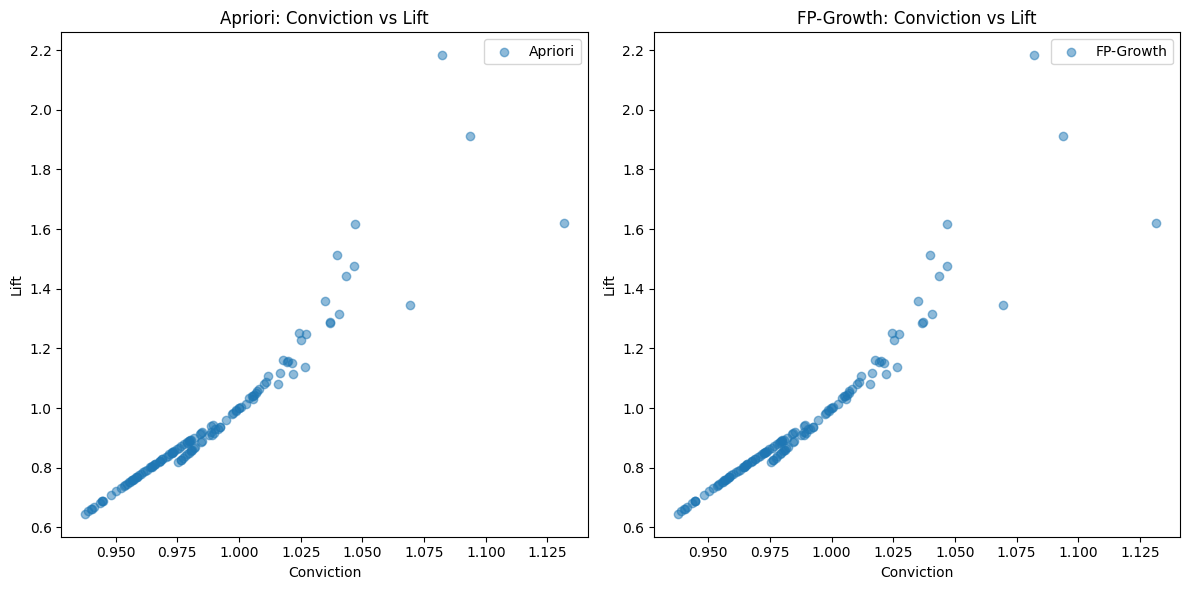

In [51]:

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Apriori (Conviction vs Lift)
ax[0].scatter(rules['conviction'], rules['lift'], label='Apriori', alpha=0.5)
ax[0].set_xlabel('Conviction')
ax[0].set_ylabel('Lift')
ax[0].set_title('Apriori: Conviction vs Lift')
ax[0].legend()

# Plot for FP-Growth (Conviction vs Lift)
ax[1].scatter(rules_fpgrowth['conviction'], rules_fpgrowth['lift'], label='FP-Growth', alpha=0.5)
ax[1].set_xlabel('Conviction')
ax[1].set_ylabel('Lift')
ax[1].set_title('FP-Growth: Conviction vs Lift')
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


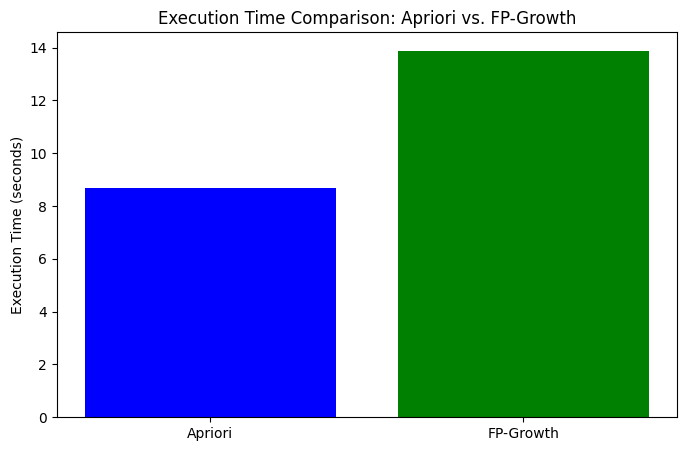

Apriori execution time: 8.6712 seconds
FP-Growth execution time: 13.8862 seconds


In [52]:
# Plotting execution time comparison
plt.figure(figsize=(8, 5))
plt.bar(["Apriori", "FP-Growth"], [apriori_execution_time, fp_execution_time], color=['blue', 'green'])
plt.title('Execution Time Comparison: Apriori vs. FP-Growth')
plt.ylabel('Execution Time (seconds)')
plt.show()

# Print out execution times
print(f"Apriori execution time: {apriori_execution_time:.4f} seconds")
print(f"FP-Growth execution time: {fp_execution_time:.4f} seconds")

In [57]:
#suggested: Apriori